# Loading the data

In [1]:
%pylab inline
import h5py

Populating the interactive namespace from numpy and matplotlib


In [2]:
f_train_l = h5py.File('train_labeled.h5','r')
f_train_ul = h5py.File('train_unlabeled.h5','r')
f_test = h5py.File('test.h5','r')
print(f_train_l.keys())
print(f_train_ul.keys())
print(f_test.keys())

KeysView(<HDF5 file "train_labeled.h5" (mode r)>)
KeysView(<HDF5 file "train_unlabeled.h5" (mode r)>)
KeysView(<HDF5 file "test.h5" (mode r)>)


In [3]:
a_train_l = f_train_l['train']
a_train_ul = f_train_ul['train']
a_test = f_test['test']
print(a_train_l.keys())
print(a_train_ul.keys())
print(a_test.keys())

KeysView(<HDF5 group "/train" (6 members)>)
KeysView(<HDF5 group "/train" (4 members)>)
KeysView(<HDF5 group "/test" (4 members)>)


In [4]:
b = a_train_ul['block0_values']
b.shape

(21000, 128)

In [5]:
# axis0 -> Labels [shape (129,)]
# axis1 -> id column [shape (9000,)] [shape (21000,)]
# block0_items -> traits labels [shape (128,)]
# block0_values -> traits values [shape (9000,128)] [shape (21000,128)]
# block1_items -> 'y' label
# block1_values -> y column (without label) [shape (9000,1)] [shape (21000,1)]

In [6]:
X_train_l = a_train_l['block0_values'][()]
X_train_l = np.float32(X_train_l)
y_train_l = a_train_l['block1_values'][()]
y_train_l = np.float32(y_train_l)
X_train_ul = a_train_ul['block0_values'][()]
X_train_ul = np.float32(X_train_ul)
y_train_l = y_train_l[:,0]
X_test = a_test['block0_values'][()]
X_test = np.float32(X_test)

# TensorFlow

In [7]:
import tensorflow as tf
sess = tf.InteractiveSession()

In [8]:
x = tf.placeholder(tf.float32, shape=[None, 128])
v = tf.Variable( tf.random_normal([128, 1], mean=0, stddev=0.1) )

In [9]:
norm = tf.matmul(tf.transpose(v),v)
v = tf.div(v,norm)

In [10]:
sess.run(tf.initialize_all_variables())

In [11]:
l = -tf.matmul(tf.transpose(tf.matmul(x,v)),tf.matmul(x,v))

In [12]:
train_step = tf.train.GradientDescentOptimizer(0.9).minimize(l)

In [13]:
#train_step.run(feed_dict={x: X_train_l})

In [14]:
#_, lo = sess.run([train_step, l], feed_dict={x:X_train_l})

In [15]:
prog = array([])

In [16]:
for i in arange(1000):
    _, lo = sess.run([train_step, l], feed_dict={x:X_train_l})
    v = tf.div(v,norm)
    prog = np.append(prog, lo)

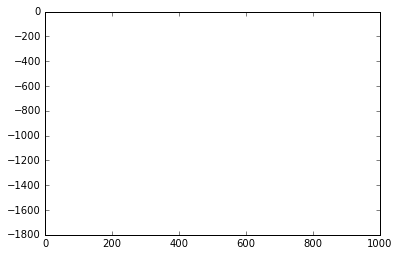

In [32]:
plot(prog)